## Problem Statement:
We have given a collection of 8 points. 

| Point | x-coordinate | y-coodinate |
| :-: | :-: | :-: |
| P1 | 0.1 | 0.6 |
| P2 | 0.15 | 0.71 |
| P3 | 0.08 | 0.9 |
| P4 | 0.16 | 0.85 |
| P5 | 0.2 | 0.3 | 
| P6 | 0.25 | 0.5 | 
| P7 | 0.24 | 0.1 | 
| P8 | 0.3 | 0.2 | 

Perform the k-mean clustering with initial centroids as m1=P1 = Cluster#1=C1 and m2=P8=cluster#2=C2 and answer the following questions based on the clusters formed
1. Which cluster does P6 belong to?
2. What is the population of cluster around m2?
3. What is updated value of m1 and m2?

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = {
    'point': ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8'],
    'x': [0.1, 0.15, 0.08, 0.16, 0.2, 0.25, 0.24, 0.3], 
    'y': [0.6, 0.71, 0.9, 0.85, 0.3, 0.5, 0.1, 0.2]
} 
df = pd.DataFrame.from_dict(data) 
label = "label"

In [3]:
df.head()

,point,x,y
0,P1,0.10,0.60
1,P2,0.15,0.71
2,P3,0.08,0.90
3,P4,0.16,0.85
4,P5,0.20,0.30


In [4]:
df.describe()

,x,y
count,8.000000,8.000000
mean,0.185000,0.520000
std,0.076345,0.298424
min,0.080000,0.100000
25%,0.137500,0.275000
50%,0.180000,0.550000
75%,0.242500,0.745000
max,0.300000,0.900000


In [6]:
# Function to calculate euclidean distance between two points
def euclidean_distance(point_a, point_b):
    distance = 0
    for i in range(len(point_a)):
        distance = distance + (point_a[i]-point_b[i])**2
    return distance**0.5

In [7]:
# Funtion to implement K Means algorithm
def k_means(data, n_clusters, centroids=[]):
    '''
    params: {data, n_clusters, centroids}
    - data : { Input data }
    - type : list
    
    - n_clusters : {number of clusters}
    - type : int
    
    - centroids: {initial centroid points}
    - type : list
    
    - returns: {clusters, new_centroids, inertia}
    - clusters: {centroid assignment for each point in the dataset}
    - type : list
    
    - new_centroids: {final centroid points}
    - type : list  
    
    - inertia: {inertial of new centroids}
    - type : float
    
    '''
    # Initializing centroids randomly of empty array is passsed
    if len(centroids) == 0: centroids =  random.sample(data, n_clusters) 
    while True:
        inertia = 0
        clusters = {f"cluster_{k}": [] for k in range(n_clusters)}
        # Calculating distance between centroids and each point in the dataset 
        for point in data:
            distance = []
            for centroid in centroids:
                distance.append(euclidean_distance(point, centroid))
            # Evaluating the nearest centroid for each data point
            min_distance = distance.index(min(distance))
            clusters[f"cluster_{min_distance}"].append(point)
            inertia += min(distance)**2
        new_centroids = []
        # Calculating coordinates of new centroids
        for i in clusters:
            new_centroids.append([float(sum(col))/len(col) for col in zip(*clusters[i])])
        if  sorted(centroids) == sorted(new_centroids):
            return clusters, centroids, inertia
        else: centroids = new_centroids

In [11]:
# Funtion to plot clusters 
def plot_clusters(centroids, clusters):
    '''
    - pararms: {clusters, centroids}
    - clusters: {centroid assignment for each point in the dataset}
    - type : list
    
    - centroids: {initial centroid points}
    - type : list  
    '''
    # Plotting points in each cluster
    for i in clusters:
        cluster = np.array(clusters[i])
        x, y = cluster.T
        plt.scatter(x, y, label=i)
    # Plotting centroids for each cluster
    for centroid in centroids:
        x, y = np.array(centroid).T
        plt.scatter(x, y, s=200, c='yellow')
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})
    plt.title('Clusters')
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.legend()
    plt.show()

Enter number of clusters: 2


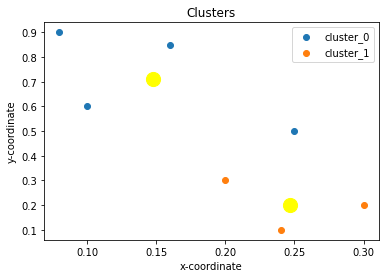

In [12]:
df_list = df[['x','y']].values.tolist()
n_clusters = int(input("Enter number of clusters: "))
centroids = [[0.1, 0.6], [0.3, 0.2]]
clusters, centroids, inertia = k_means(df_list, n_clusters, centroids)
plot_clusters(centroids, clusters)